In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

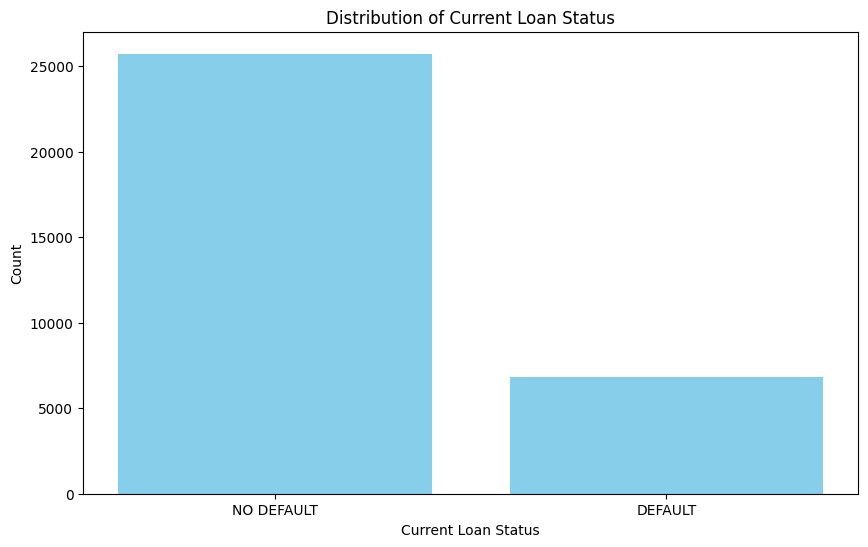

In [59]:
# Count the occurrences of each category in 'Current_loan_status'
status_counts = data['Current_loan_status'].value_counts()

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(status_counts.index, status_counts.values, color='skyblue')

# Add labels and title
plt.xlabel('Current Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Current Loan Status')

# Show the plot
plt.show()

In [43]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Loan_status.csv')

# Display the first five rows
data.head()



,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


In [44]:
data.shape

(32586, 13)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          32583 non-null  float64
 1   customer_age         32586 non-null  int64  
 2   customer_income      32586 non-null  object 
 3   home_ownership       32586 non-null  object 
 4   employment_duration  31691 non-null  float64
 5   loan_intent          32586 non-null  object 
 6   loan_grade           32586 non-null  object 
 7   loan_amnt            32585 non-null  object 
 8   loan_int_rate        29470 non-null  float64
 9   term_years           32586 non-null  int64  
 10  historical_default   11849 non-null  object 
 11  cred_hist_length     32586 non-null  int64  
 12  Current_loan_status  32582 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.2+ MB


In [3]:
#data preprocessing 

#1. data cleaning
# Data Cleaning

# Drop duplicate rows
data = data.drop_duplicates()

# Ensure 'customer_id' is unique and sequential
data['customer_id'] = range(1, len(data) + 1)

# Handle missing values for 'employment_duration' with mean value
mean_employment_duration = data['employment_duration'].mean()
data['employment_duration'].fillna(mean_employment_duration, inplace=True)

# Clean 'loan_amnt' by removing any currency symbols (£, €, etc.) and commas, then convert to numeric
data['loan_amnt'] = data['loan_amnt'].replace({'€': '', '£': '', ',': ''}, regex=True)
data['loan_amnt'] = pd.to_numeric(data['loan_amnt'], errors='coerce')
mean_loan_amnt = data['loan_amnt'].mean()
data['loan_amnt'].fillna(mean_loan_amnt, inplace=True)

# Remove commas, currency symbols, and other non-numeric characters
data['customer_income'] = (
    data['customer_income']
    .str.replace('[£€$,]', '', regex=True)  # Remove symbols
    .str.strip()  # Remove leading/trailing spaces
)

# Convert to numeric
data['customer_income'] = pd.to_numeric(data['customer_income'], errors='coerce')


# Handle missing values for 'loan_int_rate' with mean value
mean_loan_int_rate = data['loan_int_rate'].mean()
data['loan_int_rate'].fillna(mean_loan_int_rate, inplace=True)

# Handle missing values for 'historical_default' with mode value
mode_historical_default = data['historical_default'].mode()[0]
data['historical_default'].fillna(mode_historical_default, inplace=True)

#dropping target variables that are missing
data.dropna(subset=['Current_loan_status'], inplace=True)


NameError: name 'data' is not defined

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32576 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          32576 non-null  int64  
 1   customer_age         32576 non-null  int64  
 2   customer_income      32576 non-null  int64  
 3   home_ownership       32576 non-null  object 
 4   employment_duration  32576 non-null  float64
 5   loan_intent          32576 non-null  object 
 6   loan_grade           32576 non-null  object 
 7   loan_amnt            32576 non-null  float64
 8   loan_int_rate        32576 non-null  float64
 9   term_years           32576 non-null  int64  
 10  historical_default   11840 non-null  object 
 11  cred_hist_length     32576 non-null  int64  
 12  Current_loan_status  32576 non-null  object 
dtypes: float64(3), int64(5), object(5)
memory usage: 3.5+ MB


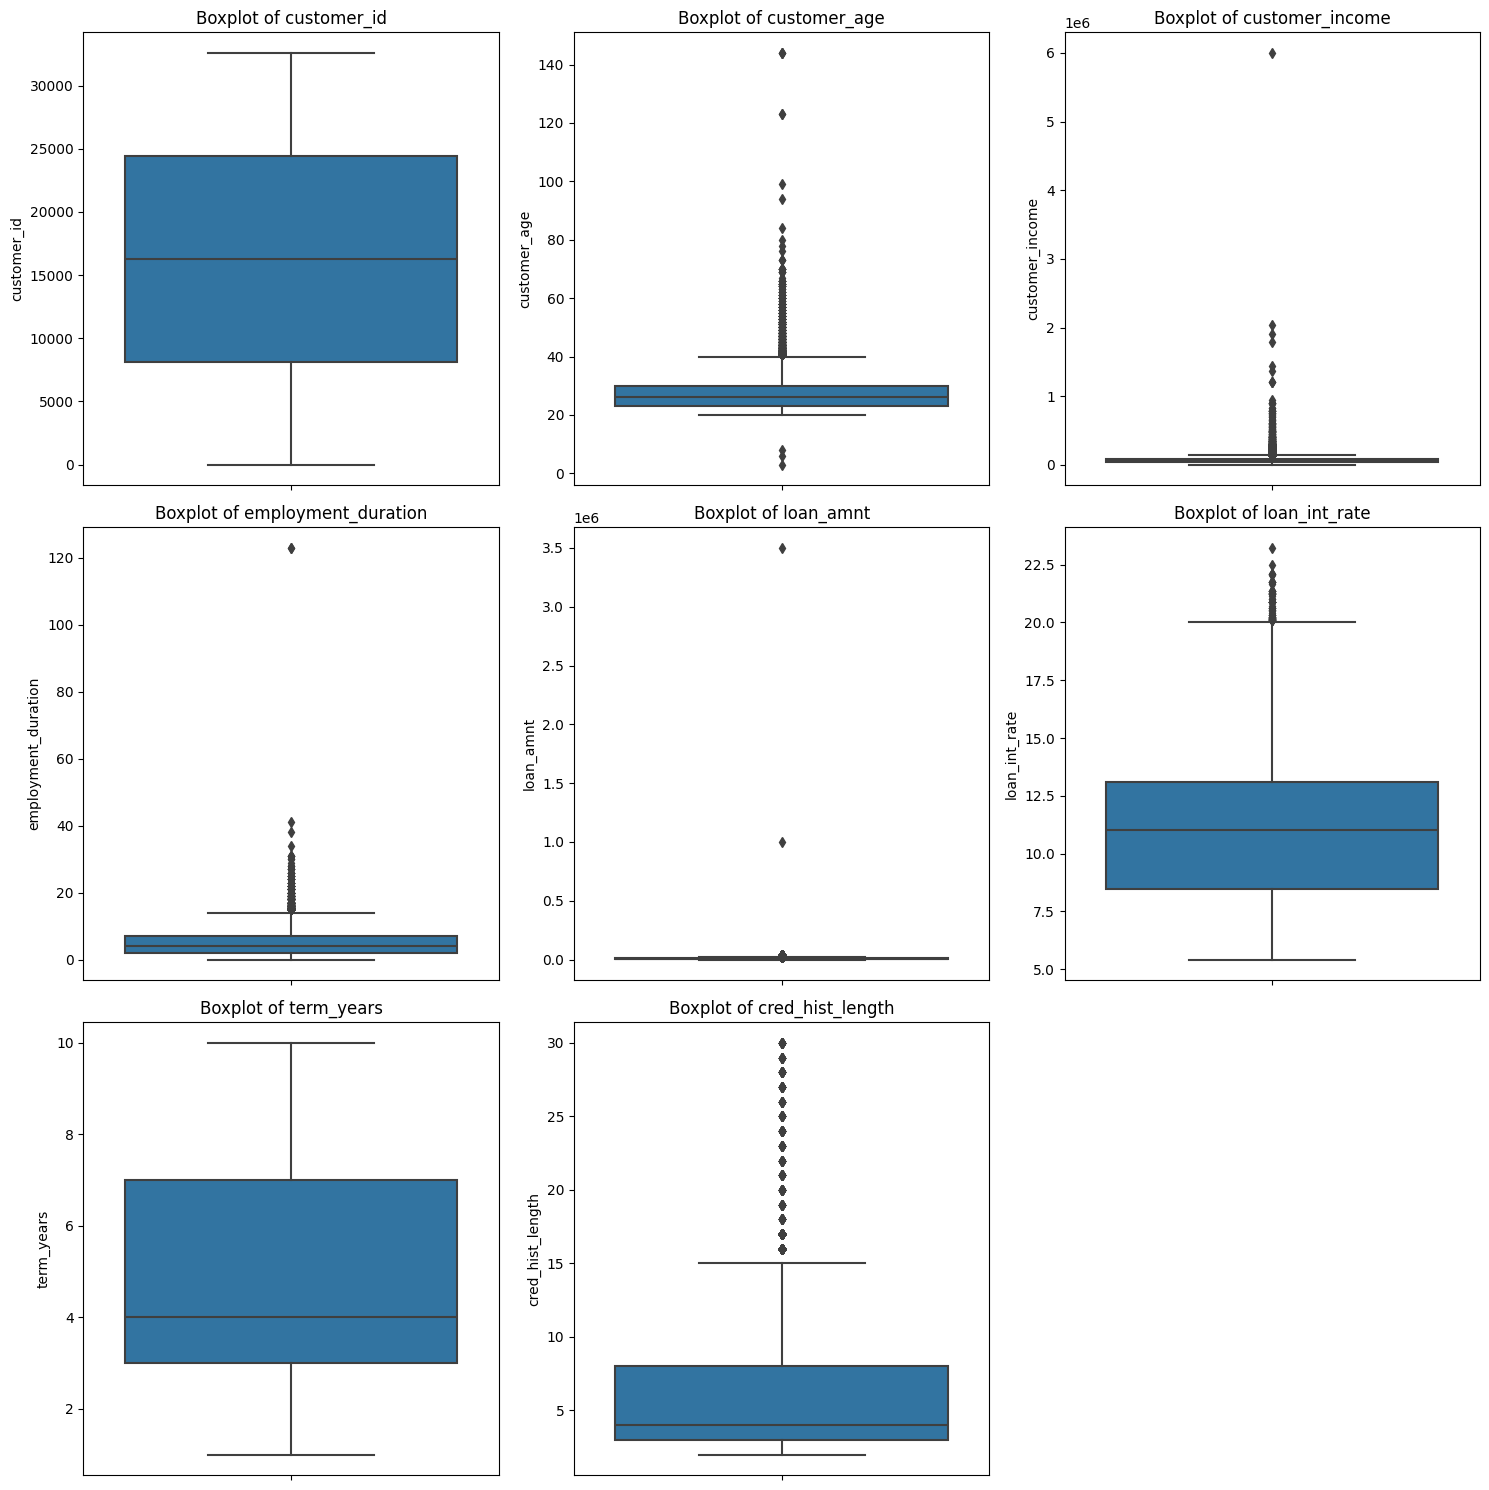

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate rows and columns dynamically
import math

# Select numeric columns for boxplots
numeric_columns = ['customer_age', 'customer_income', 'loan_amnt', 'loan_int_rate', 'term_years', 'employment_duration', 'cred_hist_length']



numeric_columns = [col for col in data.select_dtypes(include=['number']).columns]
n_cols = 3
n_rows = math.ceil(len(numeric_columns) / n_cols)

plt.figure(figsize=(15, 5*n_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [49]:
import pandas as pd

def handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap outliers
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    return data

# Apply to your dataset
columns_with_outliers = ['customer_age', 'customer_income', 'loan_amnt', 'loan_int_rate', 'employment_duration', 'cred_hist_length']
for col in columns_with_outliers:
    data = handle_outliers(data, col)



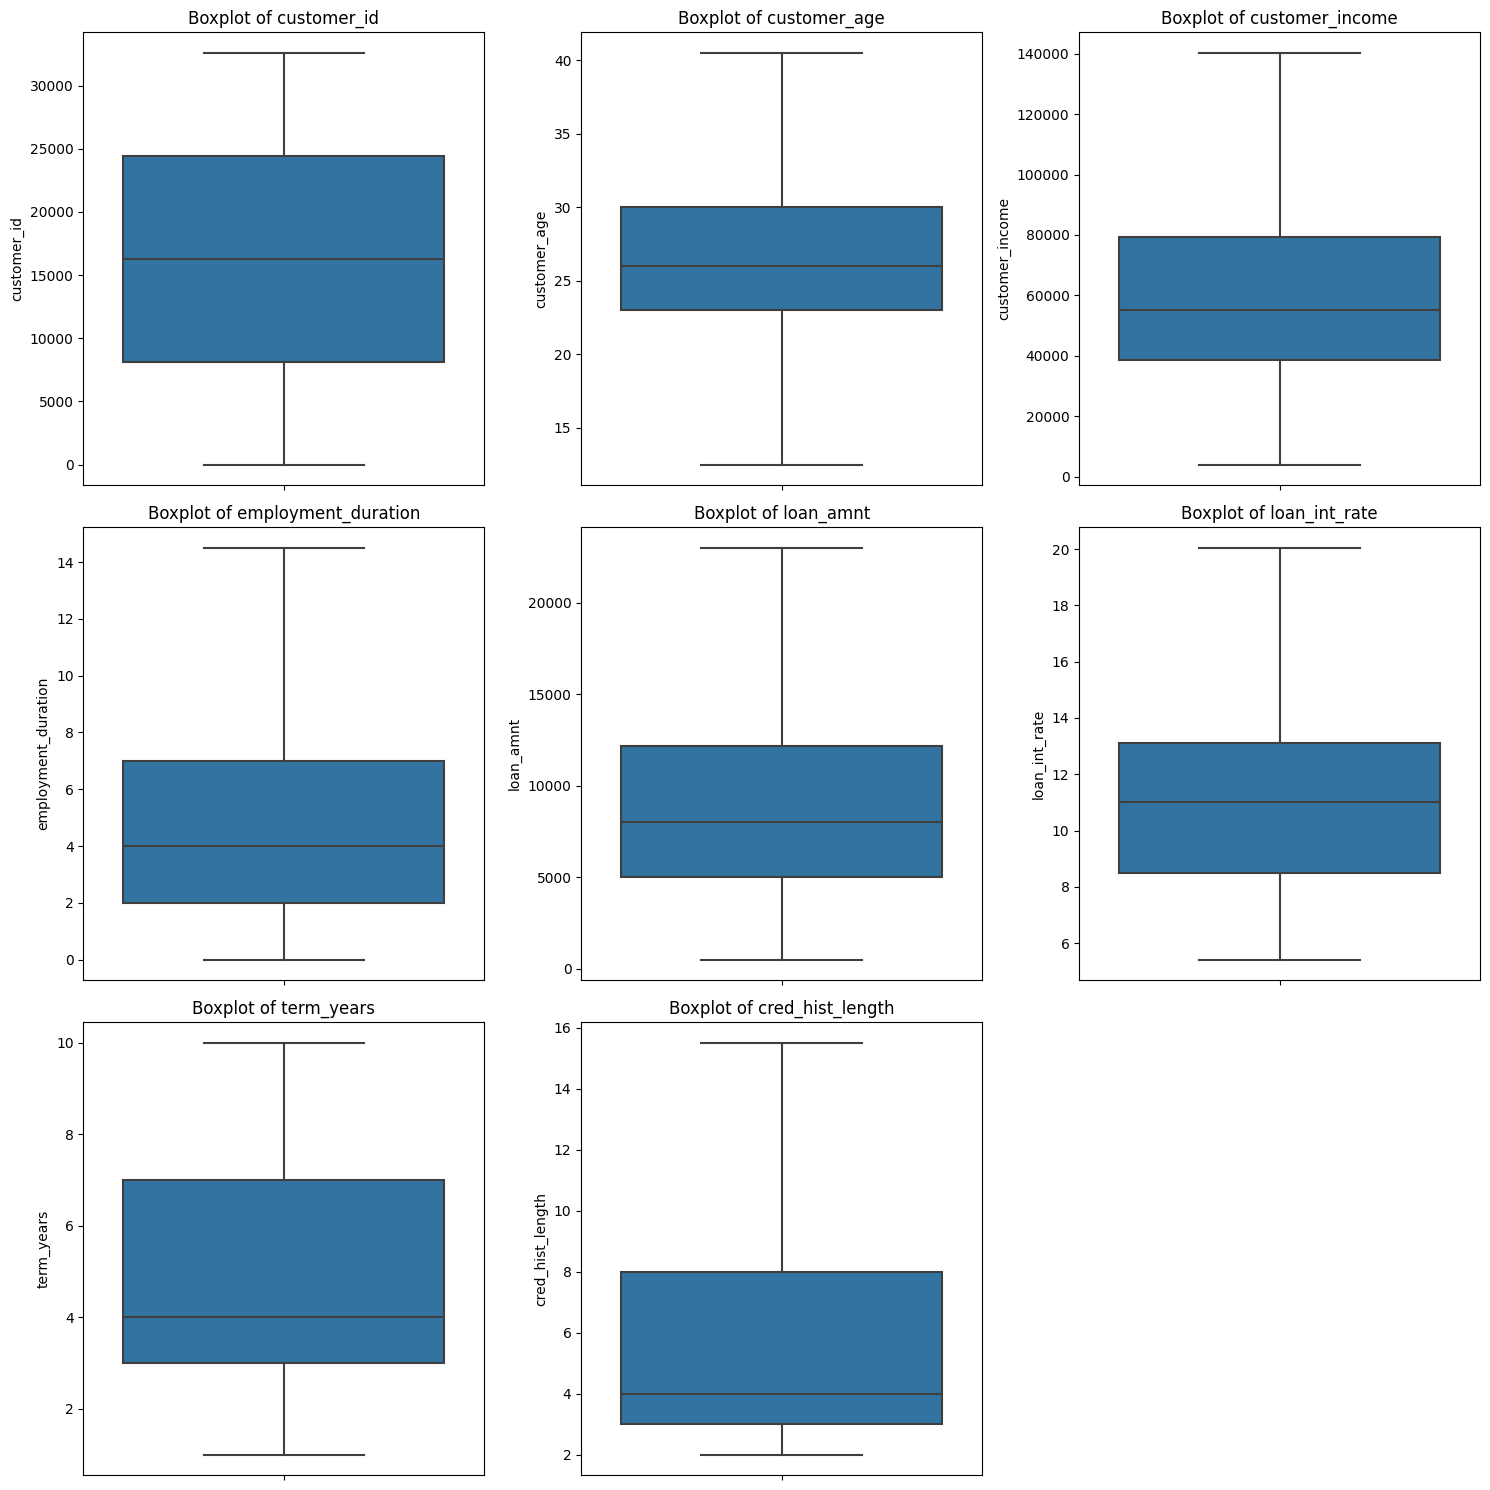

In [50]:
#check if the outliers have been handled
plt.figure(figsize=(15, 5*n_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [25]:
# Select only numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns
correlation_matrix = data[numeric_columns].corr()
print(correlation_matrix)


                     customer_id  customer_age  customer_income  \
customer_id             1.000000      0.799852         0.239594   
customer_age            0.799852      1.000000         0.128183   
customer_income         0.239594      0.128183         1.000000   
employment_duration     0.176950      0.157263         0.202232   
loan_amnt               0.103871      0.054687         0.414989   
loan_int_rate           0.001748      0.013530        -0.017170   
term_years              0.143674      0.156359         0.101213   
cred_hist_length        0.800412      0.874568         0.097317   

                     employment_duration  loan_amnt  loan_int_rate  \
customer_id                     0.176950   0.103871       0.001748   
customer_age                    0.157263   0.054687       0.013530   
customer_income                 0.202232   0.414989      -0.017170   
employment_duration             1.000000   0.111309      -0.057641   
loan_amnt                       0.111309   1.0

In [51]:
# Drop 'customer_id' and 'cred_hist_length' from the dataset
data = data.drop(columns=['customer_id', 'cred_hist_length'])

# Verify that the columns have been dropped
data.head()


,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,Current_loan_status
0,22.0,59000,RENT,14.5,PERSONAL,C,23000.0,16.02,10,DEFAULT
1,21.0,9600,OWN,5.0,EDUCATION,A,1000.0,11.14,1,NO DEFAULT
2,25.0,9600,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5,DEFAULT
3,23.0,65500,RENT,4.0,MEDICAL,B,23000.0,15.23,10,DEFAULT
4,24.0,54400,RENT,8.0,MEDICAL,B,23000.0,14.27,10,DEFAULT


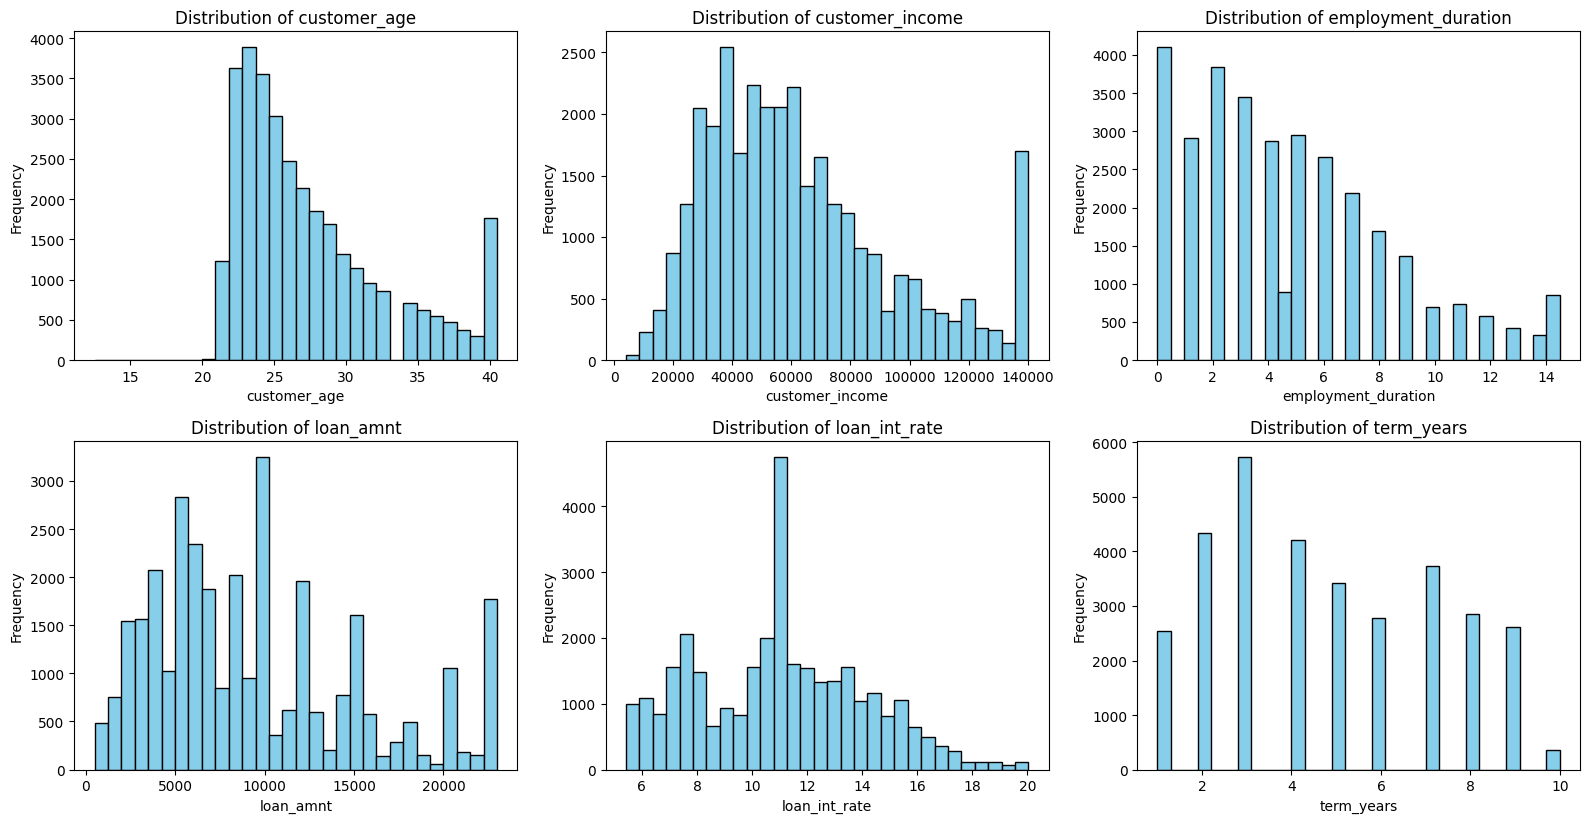

In [52]:
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Set up the plot
plt.figure(figsize=(16, 12))

# Create a histogram for each numeric variable
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)  # Adjust rows/columns for layout
    plt.hist(data[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32576 entries, 0 to 32585
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_age         32576 non-null  float64
 1   customer_income      32576 non-null  int64  
 2   home_ownership       32576 non-null  object 
 3   employment_duration  32576 non-null  float64
 4   loan_intent          32576 non-null  object 
 5   loan_grade           32576 non-null  object 
 6   loan_amnt            32576 non-null  float64
 7   loan_int_rate        32576 non-null  float64
 8   term_years           32576 non-null  int64  
 9   Current_loan_status  32576 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 2.7+ MB


In [54]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Binning numerical variables
data['employment_duration_group'] = pd.cut(data['employment_duration'], bins=[0, 2, 5, 10, 20, 50, 100, 200], labels=['0-2', '2-5', '5-10', '10-20', '20-50', '50-100', '100-200'])
data['loan_amnt_group'] = pd.cut(data['loan_amnt'], bins=[0, 5000, 10000, 20000, 50000], labels=['0-5k', '5k-10k', '10k-20k', '20k-50k'])

# Log Transformation
# Apply log(x) transformation
data['log_loan_amnt'] = np.log(data['loan_amnt'])
data['log_employment_duration'] = np.log(data['employment_duration'] + 1)

# Interaction Terms
data['loan_int_rate_loan_amnt_interaction'] = data['loan_int_rate'] * data['loan_amnt']
data['employment_duration_loan_amnt_interaction'] = data['employment_duration'] * data['loan_amnt']

# New Features
data['debt_to_income_ratio'] = data['loan_amnt'] / (data['employment_duration'] + 1e-10)


# Encoding Categorical Variables
# One-Hot Encoding for nominal variables
data = pd.get_dummies(data, columns=['home_ownership', 'loan_intent', 'loan_grade', 'historical_default'], drop_first=True)

# Feature Scaling
scaler = StandardScaler()
numerical_features = ['employment_duration', 'loan_amnt', 'loan_int_rate', 'term_years']
data[numerical_features] = scaler.fit_transform(data[numerical_features])



C:\Users\ttt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ttt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


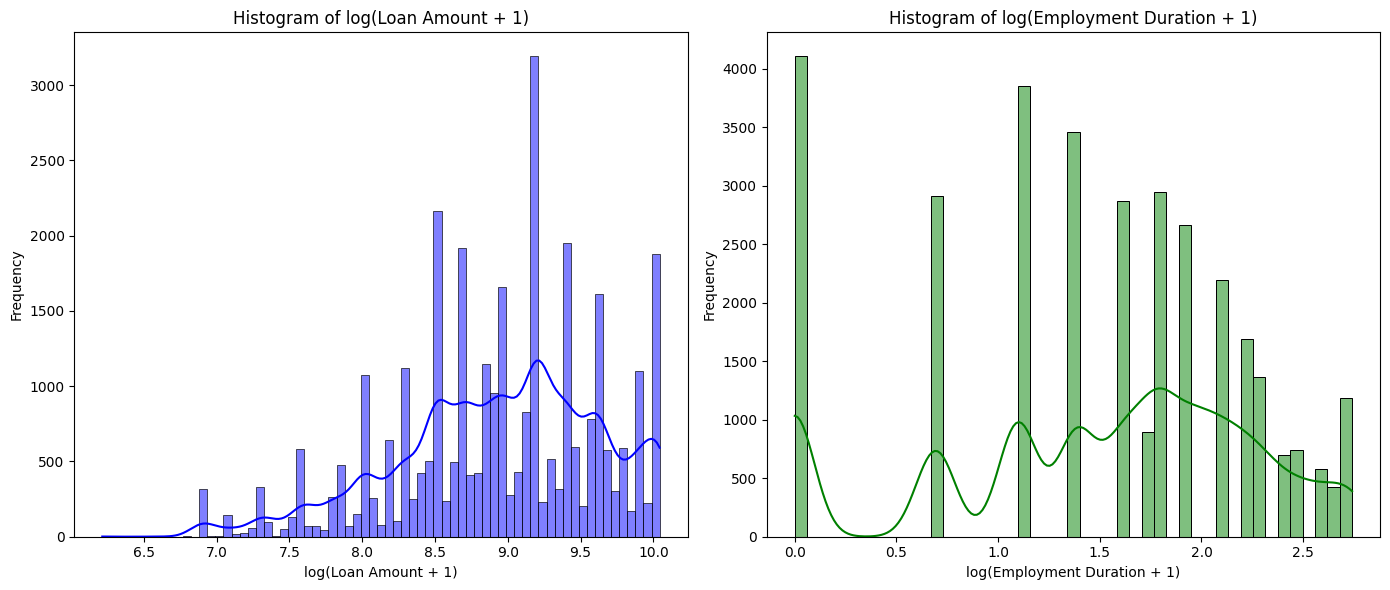

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes for plotting
plt.figure(figsize=(14, 6))

# Plotting the histogram for log_loan_amnt
plt.subplot(1, 2, 1)  # (rows, columns, index)
sns.histplot(data['log_loan_amnt'], kde=True, color='blue')
plt.title('Histogram of log(Loan Amount + 1)')
plt.xlabel('log(Loan Amount + 1)')
plt.ylabel('Frequency')

# Plotting the histogram for log_employment_duration
plt.subplot(1, 2, 2)
sns.histplot(data['log_employment_duration'], kde=True, color='green')
plt.title('Histogram of log(Employment Duration + 1)')
plt.xlabel('log(Employment Duration + 1)')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()


In [55]:
from sklearn.model_selection import train_test_split

# Separate the target variable (Current_loan_status) from the features
X = data.drop(columns=['Current_loan_status'])  # Features
y = data['Current_loan_status']  # Target variable

# Split the dataset into training and testing sets (80-20 split, stratified on target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [56]:
X.head()

,customer_age,customer_income,employment_duration,loan_amnt,loan_int_rate,term_years,employment_duration_group,loan_amnt_group,log_loan_amnt,log_employment_duration,...,home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E
0,22.0,59000,2.636139,2.338372,1.628867,2.120464,10-20,20k-50k,10.043249,2.740840,...,True,False,False,False,True,False,False,True,False,False
1,21.0,9600,0.079720,-1.446368,0.042303,-1.522349,2-5,0-5k,6.907755,1.791759,...,False,True,False,False,False,False,False,False,False,False
2,25.0,9600,-0.996666,-0.672217,0.604753,0.096679,0-2,5k-10k,8.612503,0.693147,...,False,False,False,True,False,False,True,False,False,False
3,23.0,65500,-0.189376,2.338372,1.372026,2.120464,2-5,20k-50k,10.043249,1.609438,...,True,False,False,True,False,False,True,False,False,False
4,24.0,54400,0.887011,2.338372,1.059915,2.120464,5-10,20k-50k,10.043249,2.197225,...,True,False,False,True,False,False,True,False,False,False


In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32576 entries, 0 to 32585
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   customer_age                               32576 non-null  float64
 1   customer_income                            32576 non-null  int64  
 2   employment_duration                        32576 non-null  float64
 3   loan_amnt                                  32576 non-null  float64
 4   loan_int_rate                              32576 non-null  float64
 5   term_years                                 32576 non-null  float64
 6   employment_duration_group                  32576 non-null  int32  
 7   loan_amnt_group                            32576 non-null  int32  
 8   log_loan_amnt                              32576 non-null  float64
 9   log_employment_duration                    32576 non-null  float64
 10  loan_int_rate_loan_amnt_int

In [36]:
# Find rows with infinity in the problematic column
inf_rows = X[np.isinf(X['debt_to_income_ratio'])]
print("Rows with infinite values in 'debt_to_income_ratio':")
print(inf_rows[['employment_duration', 'loan_amnt', 'debt_to_income_ratio']])

Rows with infinite values in 'debt_to_income_ratio':
Empty DataFrame
Columns: [employment_duration, loan_amnt, debt_to_income_ratio]
Index: []


In [57]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to ordinal columns
data['employment_duration_group'] = label_encoder.fit_transform(data['employment_duration_group'])
data['loan_amnt_group'] = label_encoder.fit_transform(data['loan_amnt_group'])

# Separate the target variable (Current_loan_status) from the features
X = data.drop(columns=['Current_loan_status'])  # Features
y = data['Current_loan_status']  # Target variable

# Split the dataset into training and testing sets (80-20 split, stratified on target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report (Precision, Recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7902
Confusion Matrix:
[[   0 1367]
 [   0 5149]]
Classification Report:


C:\Users\ttt\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     DEFAULT       0.00      0.00      0.00      1367
  NO DEFAULT       0.79      1.00      0.88      5149

    accuracy                           0.79      6516
   macro avg       0.40      0.50      0.44      6516
weighted avg       0.62      0.79      0.70      6516



C:\Users\ttt\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ttt\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd

# Load and preprocess the data (replace with your preprocessing steps)
# Assuming 'data' is the preprocessed DataFrame and 'Current_loan_status' is the target column
X = data.drop(columns=['Current_loan_status'])  # Features
y = data['Current_loan_status']  # Target variable

# Split the data into training and testing sets (80-20 split, stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)  # Initialize SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)  # Resample training data

# Verify the class distribution after resampling
print("Class distribution after SMOTE:")
print(y_train_resampled.value_counts())

# Train a Random Forest model on the resampled dataset
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC-AUC

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")


Class distribution after SMOTE:
Current_loan_status
NO DEFAULT    20591
DEFAULT       20591
Name: count, dtype: int64
Classification Report:
              precision    recall  f1-score   support

     DEFAULT       0.81      0.73      0.77      1367
  NO DEFAULT       0.93      0.95      0.94      5149

    accuracy                           0.91      6516
   macro avg       0.87      0.84      0.85      6516
weighted avg       0.90      0.91      0.91      6516

Confusion Matrix:
[[ 996  371]
 [ 232 4917]]
ROC-AUC Score: 0.9191


In [61]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd

# Load and preprocess the data (replace with your preprocessing steps)
# Assuming 'data' is the preprocessed DataFrame and 'Current_loan_status' is the target column
X = data.drop(columns=['Current_loan_status'])  # Features
y = data['Current_loan_status']  # Target variable

# Split the data into training and testing sets (80-20 split, stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)  # Initialize SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)  # Resample training data

# Verify the class distribution after resampling
print("Class distribution after SMOTE:")
print(y_train_resampled.value_counts())

# Train a Logistic Regression model on the resampled dataset
log_reg = LogisticRegression(random_state=42, max_iter=500, class_weight='balanced')
log_reg.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC-AUC

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")


Class distribution after SMOTE:
Current_loan_status
NO DEFAULT    20591
DEFAULT       20591
Name: count, dtype: int64
Classification Report:
              precision    recall  f1-score   support

     DEFAULT       0.21      1.00      0.35      1367
  NO DEFAULT       0.00      0.00      0.00      5149

    accuracy                           0.21      6516
   macro avg       0.10      0.50      0.17      6516
weighted avg       0.04      0.21      0.07      6516

Confusion Matrix:
[[1367    0]
 [5149    0]]
ROC-AUC Score: 0.5927


C:\Users\ttt\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ttt\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ttt\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to ordinal columns
data['employment_duration_group'] = label_encoder.fit_transform(data['employment_duration_group'])
data['loan_amnt_group'] = label_encoder.fit_transform(data['loan_amnt_group'])

# Separate the target variable (Current_loan_status) from the features
X = data.drop(columns=['Current_loan_status'])  # Features
y = data['Current_loan_status']  # Target variable

# Split the dataset into training and testing sets (80-20 split, stratified on target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report (Precision, Recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9159
Confusion Matrix:
[[ 935  432]
 [ 116 5033]]
Classification Report:
              precision    recall  f1-score   support

     DEFAULT       0.89      0.68      0.77      1367
  NO DEFAULT       0.92      0.98      0.95      5149

    accuracy                           0.92      6516
   macro avg       0.91      0.83      0.86      6516
weighted avg       0.91      0.92      0.91      6516

